#### 1. 
Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением, равным 16.   
Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95,  
если выборочная средняя M = 80, а объем выборки n = 256.  

Из условий задачи:

$ \alpha = 0.95$  
$ \sigma = 16$  
$ \overline{x} = 80$  
$ n = 256$

Тогда доверительный интервал будет равен:

$$ \overline{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq M(x) \leq \overline{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} $$

По таблице значений функции Лапласа для $\alpha/2 = 0.475$ находим: $z_{\alpha/2} = 1.96$

In [93]:
#Проверим это значение с помощью функции из библиотеки scipy
#Для стандартного нормального распределения нам необходимо найти величину х такую,
#Что справа от этой точки останется 2.5% всего накопленного нормального распределения, а слева 97.5%
alfa = 0.95
half_alfa = 0.95/2
print(norm.ppf(0.5+half_alfa))

1.959963984540054


Тогда доверительный интервал составит:

$$ 80 - 1.96\frac{16}{\sqrt{256}} \leq M(x) \leq 80 + 1.96\frac{16}{\sqrt{256}} $$
$$ 80 - 1.96\frac{16}{16} \leq M(x) \leq 80 + 1.96\frac{16}{16} $$  

$$ 80 - 1.96 \leq M(x) \leq 80 + 1.96 $$  

$$ 78.04 \leq M(x) \leq 81.96 $$

#### 2. 
В результате 10 независимых измерений некоторой величины X, выполненных с одинаковой точностью, получены опытные данные:  
6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1  
Предполагая, что результаты измерений подчинены нормальному закону распределения вероятностей,  
оценить истинное значение величины X при помощи доверительного интервала,  
покрывающего это значение с доверительной вероятностью 0,95.

In [92]:
X = 6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1
df = pd.DataFrame(X)
x = df.mean()
#df.mean() == sum(X)/len(X) #Проверяем корректность среднего значения

std = np.std(X, ddof=1)
#std_2 =(((df - x)**2).sum()/(len(df) - 1))**0.5
#round(float(std), 2) == round(float(std_2), 2) #Проверяем корректность значения стандартного отклонения

print('M(x)=',round(float(x), 2))
print('std=',round(float(std), 2))

M(x)= 6.59
std= 0.45


Т.к. нам не известно среднее квадратичное отклонение для генеральной совокупности,  
применяем t-критерий Стьюдента, для n-1 = 9 и a/2 = 0.025 t = 2.262, тогда:

$$ \overline{x} - t_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq M(x) \leq \overline{x} + t_{\alpha/2}\frac{\sigma}{\sqrt{n}} $$

$$6.59 - 2.262\frac{0.45}{\sqrt{10}} \leq M(x) \leq 6.59 + 2.262\frac{0.45}{\sqrt{10}}$$

$$6.59 - 0.32 \leq M(x) \leq 6.59 + 0.32$$

$$6.27 \leq M(x) \leq 6.91$$

#### 3. 
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм.  
Используя односторонний критерий с α=0,05, проверить эту гипотезу,  
если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв.мм.

$ \alpha = 0.05$  
$ D(x) = \sigma^2 = 4$
$ \sigma = 2$
$ \mu_0 = \overline{x} = 17.0$  
$ \mu= 17.5$  
$ n = 100$

Нулевая гипотеза $H_0$: $\mu = \mu_0 = 17.0$  
Альтернативная гипотеза $H$: $\mu_0 < \mu = 17.5$

Т.к. нам известна дисперсия и следовательно стандартное отклонение, то гипотезу следует проверить с помощью Z-критерия  
Вычислим наблюдаемое значение критерия:

$$\frac{\overline{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}} = \frac{\overline{x} - \mu_0}{{\sigma}}{\sqrt{n}} = \frac{17.5 - 17}{2}{\sqrt{100}} = 2.5$$


In [109]:
#Оприеделим значение Z для одностороннего критерия 0.05
norm.ppf(0.95)

1.6448536269514722

Т.к. значение наблюдаемого критерия больше, чем значение для одностороннего критерия $ \alpha = 0.05$:

$$2.5 > 1.645$$

####  Гипотеза $H_0$ не может быть принята

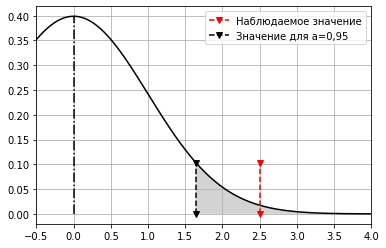

In [153]:
#код для построения графиков находится в конце блокнота
plot_task_3(0, 1, 1.645, 4)

In [100]:
#Добавить график

#### 4. 
Продавец утверждает, что средний вес пачки печенья составляет 200 г.  
Из партии извлечена выборка из 10 пачек.  
Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190.  
Известно, что их веса распределены нормально.  
Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%?

In [116]:
#Вычислим значения для выборки
X = 202, 203, 199, 197, 195, 201, 200, 204, 194, 190
df = pd.DataFrame(X)
x = df.mean()
#df.mean() == sum(X)/len(X) #Проверяем корректность среднего значения

#std = np.std(X, ddof=1)
#std_2 =(((df - x)**2).sum()/(len(df) - 1))**0.5
round(float(std), 2) == round(float(std_2), 2) #Проверяем корректность значения стандартного отклонения

print('M(x)=',round(float(x), 2))
print('std=',round(float(std), 2))
print('n=',len(df))

M(x)= 198.5
std= 4.45
n= 10


Нулевая гипотеза $H_0$: $\mu = \mu_0 = 200$  
Альтернативная гипотеза $H$: $\mu_0 \neq \mu$

Т.к. нам не известно среднее квадратичное отклонение для генеральной совокупности,  
применяем t-критерий Стьюдента, для n-1 = 9 и a/2 = 0.005 t = 3.25

Вычислим наблюдаемое значение критерия
$$\frac{\overline{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}} = \frac{\overline{x} - \mu_0}{{\sigma}}{\sqrt{n}} = \frac{198.5 - 200.0}{4.45}{\sqrt{10}} = -\frac{1.5}{4.45}{3.162} = 1.065$$

Т.к. значение наблюдаемого критерия больше, чем значение для двустороннего критерия $ \alpha = 0.01$:

$$1.065 < 3.25$$

#### Гипотеза  $H_0$ верна

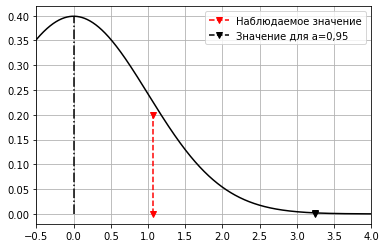

In [160]:
plot_task_4(0, 1, 3.25, 4)

In [44]:
#Код ниже - для построения графиков
import random
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def normal_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

In [157]:
def plot_task_3(mu, sigma, a=None, b=None, a2=None, b2=None):
    """Строит нормальное распределение,
    если необходимо то закрашивает участок под кривой [a, b]
    mu - математическое ожидание
    sigma - среднеквадратичное отклонение
    [a, b] - участок под кривой, площадь которого необходимо найти"""
    
    #координаты точек для построения кривой нормального распределения
    x = [i/1000 for i in range(int((mu - 4*sigma)*1000), int((mu + 4*sigma)*1000))]
    y = [normal_distribution(j, mu, sigma) for j in x]
    
    #координаты точек для прямой x = my
    x_mu = [mu]*2
    y_mu = min(y), max(y)
    
    #координаты для линий, которые ограничивают площадь под кривой [a, b]
    if a and b:
        x_ab = [i/1000 for i in range(int(a*1000), int((b+1)*1000))]
        y_ab = [normal_distribution(j, mu, sigma) for j in x_ab]
        #Дублируем крайние координаты по оси х, чтобы ограничить штрихуемую площадь вертикальными прямыми
        x_ab = x_ab[:1] + x_ab + x_ab[-1:]
        y_ab = [min(y),] + y_ab + [min(y),]
        
        #Координаты вертикальных прямых x=a и x=b
        x_a = [a]*2
        y_a = [min(y), normal_distribution(a, mu, sigma)]
        
        x_b = [b]*2
        y_b = [min(y), normal_distribution(b, mu, sigma)]
        
        x_z = [2.5]*2
        y_z = [min(y), normal_distribution(a, mu, sigma)]
        
    plt.figure(figsize =(6, 4))
    plt.plot(x, y, color = 'black')
    plt.plot(x_z, y_z, color = 'red', linestyle = 'dashed', label='Наблюдаемое значение', marker='v')
    plt.plot(x_mu, y_mu, color='black', linestyle = 'dashdot')
    #plt.title('Распределение роста взрослого населения города Х')
    #plt.xlabel('Рост')
    #plt.ylabel('Плотность вероятности')
    plt.xlim(-0.5, 4)
    plt.grid()
    if a and b:
        plt.fill(x_ab, y_ab, 'lightgray')
        plt.plot(x_a, y_a, color='black', linestyle = 'dashed', label='Значение для а=0,95', marker='v')
        plt.plot(x_b, y_b, color='black', linestyle = 'dashed')
    plt.legend()
    plt.show()

In [161]:
def plot_task_4(mu, sigma, a=None, b=None, a2=None, b2=None):
    """Строит нормальное распределение,
    если необходимо то закрашивает участок под кривой [a, b]
    mu - математическое ожидание
    sigma - среднеквадратичное отклонение
    [a, b] - участок под кривой, площадь которого необходимо найти"""
    
    #координаты точек для построения кривой нормального распределения
    x = [i/1000 for i in range(int((mu - 4*sigma)*1000), int((mu + 4*sigma)*1000))]
    y = [normal_distribution(j, mu, sigma) for j in x]
    
    #координаты точек для прямой x = my
    x_mu = [mu]*2
    y_mu = min(y), max(y)
    
    #координаты для линий, которые ограничивают площадь под кривой [a, b]
    if a and b:
        x_ab = [i/1000 for i in range(int(a*1000), int((b+1)*1000))]
        y_ab = [normal_distribution(j, mu, sigma) for j in x_ab]
        #Дублируем крайние координаты по оси х, чтобы ограничить штрихуемую площадь вертикальными прямыми
        x_ab = x_ab[:1] + x_ab + x_ab[-1:]
        y_ab = [min(y),] + y_ab + [min(y),]
        
        #Координаты вертикальных прямых x=a и x=b
        x_a = [a]*2
        y_a = [min(y), normal_distribution(a, mu, sigma)]
        
        x_b = [b]*2
        y_b = [min(y), normal_distribution(b, mu, sigma)]
        
        x_z = [1.065]*2
        y_z = [min(y), (min(y)+max(y))/2]
        
    plt.figure(figsize =(6, 4))
    plt.plot(x, y, color = 'black')
    plt.plot(x_z, y_z, color = 'red', linestyle = 'dashed', label='Наблюдаемое значение', marker='v')
    plt.plot(x_mu, y_mu, color='black', linestyle = 'dashdot')
    #plt.title('Распределение роста взрослого населения города Х')
    #plt.xlabel('Рост')
    #plt.ylabel('Плотность вероятности')
    plt.xlim(-0.5, 4)
    plt.grid()
    if a and b:
        plt.fill(x_ab, y_ab, 'lightgray')
        plt.plot(x_a, y_a, color='black', linestyle = 'dashed', label='Значение для а=0,99', marker='v')
        plt.plot(x_b, y_b, color='black', linestyle = 'dashed')
    plt.legend()
    plt.show()